In [ ]:
#import pandas as pd
#import numpy as np
#from sklearn.cross_validation import train_test_split

#train, test = train_test_split(df, test_size = 0.1)
#print train.shape
#print test.shape
#test.to_csv("/Users/thomas/GA-DSI/projects/projects-weekly/project-03/Resources/Iowa_Liquor_sales_sample_10pct_TEST.csv")
#train.to_csv("/Users/thomas/GA-DSI/projects/projects-weekly/project-03/Resources/Iowa_Liquor_sales_sample_10pct_TRAIN.csv")

In [ ]:
#http://www.census.gov/popest/data/index.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
df=pd.read_csv("/Users/thomas/GA-DSI/projects/projects-weekly/project-03/Resources/Iowa_Liquor_sales_sample_10pct_train.csv")
df_test=pd.read_csv("/Users/thomas/GA-DSI/projects/projects-weekly/project-03/Resources/Iowa_Liquor_sales_sample_10pct_test.csv")

"""CONVERTING DATA TO BE USABLE; DROPS ~1150 rows out of the 244000; This is acceptable"""

#Date Conversion takes 42 Seconds
#df['Date']=pd.to_datetime(df['Date'])

#---
#Make these float columns; removing the 'dollar' signs
df['Sale (Dollars)']= [np.float(x[1:]) for x in df['Sale (Dollars)']]
df['State Bottle Retail']= [np.float(x[1:]) for x in df['State Bottle Retail']]
df['State Bottle Cost']= [np.float(x[1:]) for x in df['State Bottle Cost']]

#---
#There are Zip Codes with the value 712-2, which is the zip code of IA
    #temp=df[df['Zip Code']=='712-2']
    #print temp.shape
    #print temp['Zip Code'].value_counts()
#Only 190 entries with 712-2 as a zipcode; easy fix
df=df.replace("712-2","51529")

#---
#There are 977 rows with null values out of the 244000; this is 0.3%; it would be acceptable if we dropped these values
#temp=df[pd.notnull(df.iloc[:,6])]
    #print df.shape[0] - temp.shape[0]
    #print (df.shape[0] - temp.shape[0])/float(df.shape[0])
#df=df[pd.notnull(df.iloc[:,6])]

#---
#Changed Country number from float to int; there were null values before, so we took them out just above this
#df['County Number']=df['County Number'].astype(np.int)

#---
#Found 62 rows in Categories with null values; best to take them out
    #temp=df[pd.notnull(df.iloc[:,7])]
    #print df.shape[0] - temp.shape[0]
    #print (df.shape[0] - temp.shape[0])/float(df.shape[0])
df=df[pd.notnull(df.iloc[:,7])]
df['Category']=df['Category'].astype(np.int)

#---
#Change city column to all uppercase
df["City"]=df["City"].apply(lambda X: X.upper())

#---
#Create dictionary to fill in the null County values for each city


I want the population of each city to be included as a new column, along with other facts about each city. Right now, we can only analyze trends in the data based upon sales. If we want a much better regression, we will need to bring in our own data.

In [3]:
import time
start_time = time.time()

zips= df[pd.notnull(df["County"])].groupby(['Store Number',"County"])["County"].unique()
store=county=[]

#Splits up the groupyby appropriately
i=0
while i < len(zips):
    store.append(zips.index[i][0])
    county.append(zips.index[i][1])
    i+=1
    
#Puts the store as key and county as value
d={}
for x,y in zip(store,county):
    d[x]=y
d[5230]="Linn";d[5210]="Page";d[5227]="Clinton";d[5247]="Cerro Gordo";d[5236]="Jones";d[5217]="Wayne";
d[5220]="Cerro Gordo";d[5225]="Johnson";d[5226]="Scott";d[5222]="Linn";d[5214]="Linn";d[5240]="Cedar";
d[5233]="Marion";d[5224]="Johnson";d[5237]="Webster";d[5229]="Warren";d[5234]="Dubuque";d[5208]="Cass";
d[5218]="Lucas";d[5216]="Polk";d[5223]="Fremont";d[5232]="Audubon"
    
#Will create a new df for the store number column and overwrite previous values
#Look up every row and see if value is blank. If it is, fill it
for i in range(len(df["City"])):
    if pd.isnull(df.iloc[i,6]):
        df.iloc[i,6]=d[df.iloc[i,2]]
    
print("--- %s seconds ---" % (time.time() - start_time))

--- 42.828592062 seconds ---


In [13]:
df.columns

Index([u'Unnamed: 0', u'Date', u'Store Number', u'City', u'Zip Code',
       u'County Number', u'County', u'Category', u'Category Name',
       u'Vendor Number', u'Item Number', u'Item Description',
       u'Bottle Volume (ml)', u'State Bottle Cost', u'State Bottle Retail',
       u'Bottles Sold', u'Sale (Dollars)', u'Volume Sold (Liters)',
       u'Volume Sold (Gallons)'],
      dtype='object')

In [9]:
temp=df[pd.notnull(df.iloc[:,6])]
print df.shape[0] - temp.shape[0]
print (df.shape[0] - temp.shape[0])/float(df.shape[0])
df.head(20)
    

ValueError: Length of values does not match length of index

In [6]:
df[df['Store Number']==52]

,Unnamed: 0,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)


In [7]:
df[pd.isnull(df["County"])]

,Unnamed: 0,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)


In [13]:
df.isnull().sum(axis=0)

Unnamed: 0                 0
Date                       0
Store Number               0
City                       0
Zip Code                   0
County Number            977
County                     0
Category                   0
Category Name            510
Vendor Number              0
Item Number                0
Item Description           0
Bottle Volume (ml)         0
State Bottle Cost          0
State Bottle Retail        0
Bottles Sold               0
Sale (Dollars)             0
Volume Sold (Liters)       0
Volume Sold (Gallons)      0
dtype: int64

In [28]:
d={}
for x,y in zip(df["Item Number"],df["Item Description"]):
    d[x]=y
len(d)

2643

In [23]:
null=df[pd.isnull(df['Category Name'])]
for n["Item Description"]

,Unnamed: 0,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
213,110337,02/24/2016,4640,DAVENPORT,52807,82.0,Scott,1052100,NaN,420,48099,Hennessy VS,200,5.74,8.61,24,206.64,4.80,1.27
370,31555,02/18/2016,4969,CLEAR LAKE,50428,17.0,Cerro Gordo,1082100,NaN,420,65126,Grand Marnier Cordon Rouge,750,23.31,34.97,2,69.94,1.50,0.40
746,82402,02/24/2016,2576,STORM LAKE,50588,11.0,Buena Vista,1082100,NaN,322,65144,Il Tramonto Limoncello,750,10.00,15.00,1,15.00,0.75,0.20
992,212373,02/08/2016,2527,DES MOINES,50315,77.0,Polk,1052100,NaN,420,48105,Hennessy VS,375,9.99,14.99,12,179.88,4.50,1.19
1127,254005,02/01/2016,4624,HIAWATHA,52233,57.0,Linn,1032100,NaN,115,34820,Svedka Vodka,750,8.25,12.38,6,74.28,4.50,1.19
2041,74864,01/13/2016,2603,BETTENDORF,52722,82.0,Scott,1032100,NaN,277,34748,Stolichnaya Russian Vodka 80 Prf,1750,21.33,32.00,6,192.00,10.50,2.77
2330,139810,02/15/2016,3618,CEDAR RAPIDS,52404,57.0,Linn,1032100,NaN,115,34821,Svedka Vodka,1750,14.74,22.11,6,132.66,10.50,2.77
2583,176446,02/16/2016,5210,CLARINDA,51632,NaN,Page,1082100,NaN,130,64136,Disaronno Amaretto,750,13.86,20.79,2,41.58,1.50,0.40
2683,184962,04/22/2015,2625,DAVENPORT,52804,82.0,Scott,1022200,NaN,85,3657,Herradura Gold Reposado 6pak,750,23.58,35.37,12,424.44,9.00,2.38
3057,53507,02/29/2016,2521,WEST DES MOINES,50265,77.0,Polk,1082200,NaN,421,69713,Dr. McGillicuddy's Peach Mini,500,4.96,7.44,2,14.88,1.00,0.26


In [36]:
start_time = time.time()

#Puts the store as key and county as value
d={}
for x,y in zip(df["Item Number"],df["Item Description"]):
    if pd.notnull(y):
        d[x]=y
    else:
        print "NULLLL"
    
#Will create a new df for the store number column and overwrite previous values
#Look up every row and see if value is blank. If it is, fill it
for i in range(len(df["City"])):
    if pd.isnull(df.iloc[i,8]):
        df.iloc[i,8]=d[df.iloc[i,7]]
    
print("--- %s seconds ---" % (time.time() - start_time))

KeyError: 1052100

In [35]:
pd.isnull(df["Category"]).sum()

0

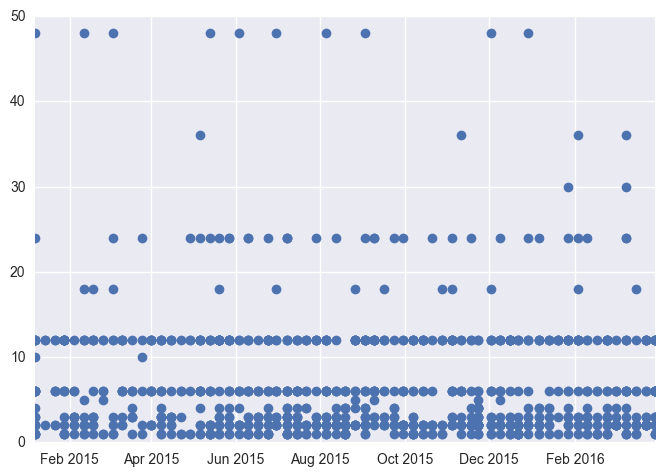

In [169]:
i=3
plt.plot_date(df[df['County Number']==i]['Date'],df[df['County Number']==i]['Bottles Sold'])
plt.ylim(0,50)
plt.show()

In [33]:
df=pd.read_csv("/Users/thomas/GA-DSI/projects/projects-weekly/project-03/Resources/Iowa_Liquor_sales_sample_10pct_train.csv")
df_test=pd.read_csv("/Users/thomas/GA-DSI/projects/projects-weekly/project-03/Resources/Iowa_Liquor_sales_sample_10pct_test.csv")

df["City"]=df["City"].apply(lambda X: X.upper())

city_dic1={}
for x,y in zip(df["City"],df["County"]):
    if pd.notnull(y):
        city_dic1[x]=y
city_dic2={"ROCKWELL" : 'Cerro Gordo County','CLARINDA' : 'Page','ALTOONA' :'Polk County','CRESCON': 'Howard','HAMPTON' :'Franklin County','DAVENPORT' :'Scott','HARLAN' : 'Shelby','CEDAR FALLS' : 'Black Hawk','ACKLEY' : 'Hardin','DUBUQUE' : 'Dubuque','WESLEY' : 'Kossuth','SIGOURNEY' : 'Keokuk','STORM LAKE' : 'Buena Vista','SIOUX CITY' : 'Woodbury','OSCEOLA' : 'Osceola','LARCHWOOD' : 'Lyon','OTTUMWA' : 'Wapello','DES MOINES' : 'Polk','WAVERLY' : 'Bremer','WATERLOO' : 'Black Hawk','EVANSDALE' : 'Black Hawk','BELMOND' : 'Wright','DUNLAP' : 'Harrison','CORALVILLE' : 'Johnson','ATLANTIC' : 'Cass','CEDAR RAPIDS' : 'Linn','RUNNELLS' : 'Polk','SEYMOUR' : 'Wayne','CHARITON' : 'Lucas','MASON CITY' : 'Cerro Gordo','TABOR' : 'Fremont','NORTH LIBERTY' : 'Johnson','CLINTON' : 'Clinton','NORWALK' : 'Warren','AUDUBON' : 'Audubon','PLEASANTVILLE' : 'Marion','ANAMOSA' : 'Jones','FORT DODGE' : 'Webster','WEST BRANCH' : 'Cedar'}
city_dic={}
for x in city_dic1:
    city_dic[x]=city_dic1[x]
for y in city_dic2:
    city_dic[y]=city_dic2[y]
#for x in city_dic:
#    print x,":",city_dic[x]
    #    KEOKUKv : 'Lee',

#Create dictionary to fill in the null County values for each city
t1=t2=t3=[]

t1=np.array(df["Store Number"])
t2=np.array(df["County"])
for x in t1:
    t3.append(city_dic[x])
print t1
t3=np.array(t3)
t1=t1.reshape((len(t1),1))
t2=t2.reshape((len(t2),1))
t3=t3.reshape((len(t3),1))
t=np.concatenate((t1,t2,t3),axis=1)
print t[0:5]
temp=pd.DataFrame(t,columns=["Store Number","Curr_County","Repl_County"])
temp.head()

#df["County"]=temp["County"]

temp=df[pd.notnull(df.iloc[:,6])]
print df.shape[0] - temp.shape[0]
print (df.shape[0] - temp.shape[0])/float(df.shape[0])
df.head(20)

KeyError: 2518